In [22]:
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/Sequence

'''
def __init__(self, x_set, y_set, batch_size):
    self.x, self.y = x_set, y_set
    self.batch_size = batch_size

def __len__(self):
    return math.ceil(len(self.x) / self.batch_size)

def __getitem__(self, idx):
    batch_x = self.x[idx * self.batch_size:(idx + 1) *
    self.batch_size]
    batch_y = self.y[idx * self.batch_size:(idx + 1) *
    self.batch_size]

    return np.array([
        resize(imread(file_name), (200, 200))
            for file_name in batch_x]), np.array(batch_y)

'''

'\ndef __init__(self, x_set, y_set, batch_size):\n    self.x, self.y = x_set, y_set\n    self.batch_size = batch_size\n\ndef __len__(self):\n    return math.ceil(len(self.x) / self.batch_size)\n\ndef __getitem__(self, idx):\n    batch_x = self.x[idx * self.batch_size:(idx + 1) *\n    self.batch_size]\n    batch_y = self.y[idx * self.batch_size:(idx + 1) *\n    self.batch_size]\n\n    return np.array([\n        resize(imread(file_name), (200, 200))\n            for file_name in batch_x]), np.array(batch_y)\n\n'

In [23]:
import math
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras

In [24]:
# !pip install tensorflow # GPU
!pip install tensorflow-cpu

In [25]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [26]:
class DataGenerator(keras.utils.Sequence):
    def __init__(self, batch_size, csv_path,
                 fold, image_size, mode='train', shuffle=True):
        self.batch_size = batch_size
        self.fold = fold
        self.image_size = image_size
        self.mode = mode
        self.shuffle = shuffle
        
        self.df = pd.read_csv(csv_path)
        
        if self.mode == 'train':
            self.df = self.df[self.df['fold'] != self.fold]
        elif self.mode == 'val':
            self.df = self.df[self.df['fold'] == self.fold]
            
        self.on_epoch_end() # 훈련 중 epoch 끝날 때 호출
        '''
        keras.utils.Sequence
            def on_epoch_end(self, epoch):
        '''
    
    # sample() : 전체 row에서 몇 %의 데이터를 return 할 것인지 설정
    # reset_index() : drop=True 옵션을 지정하면 인덱스 열을 보통의 자료열로 올리는
    # 것이 아니라 버림
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
        
    def __len__(self):
        return math.ceil(len(self.df) / self.batch_size)
    
    def __getitem__(self, idx):
        strt = idx * self.batch_size
        fin = (idx + 1) * self.batch_size
        data = self.df.iloc[strt:fin]
        batch_x, batch_y = self.get_data(data)
        
        return np.array(batch_x), np.array(batch_y)
        
    
    def get_data(self, data):
        batch_x = []
        batch_y = []
        
        for _, r in data.iterrows():
            file_name = r['file_name']
            image = cv2.imread(f'data/images/{file_name}.jpg')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (self.image_size, self.image_size))
            image = image / 255.
            
            label = int(r['species']) - 1
            
            batch_x.append(image)
            batch_y.append(label)
        
        return batch_x, batch_y

In [27]:
csv_path = 'C:\KDK\python\data\kfolds.csv'

# __init__(self, batch_size, csv_path, fold, image_size, mode = 'train', shuffle = True)

train_generator = DataGenerator(
    batch_size= 9,
    csv_path= csv_path,
    fold = 1,
    image_size= 256,
    mode = 'train',
    shuffle = True
)

In [28]:
print(len(train_generator))

654


In [29]:
654 * 9

5886

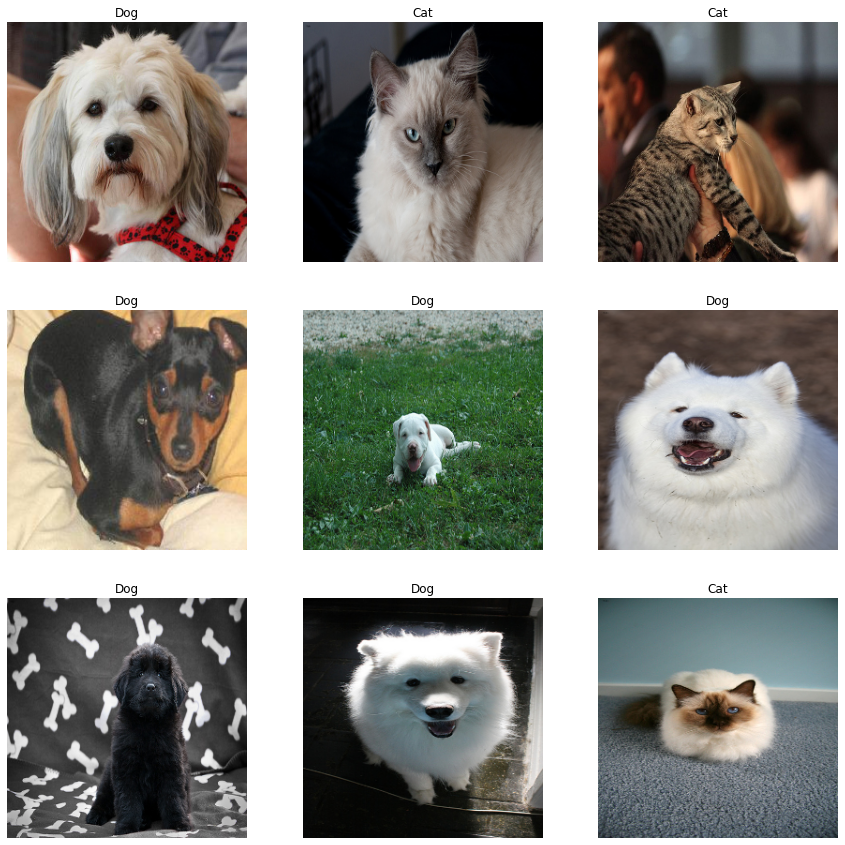

In [30]:
class_name = ['Cat', 'Dog']

for batch in train_generator:
    X, y = batch
    plt.figure(figsize=(15, 15))
    
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(X[i])
        plt.title(class_name[y[i]])
        plt.axis('off')
    break